In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
plt.rcParams['figure.figsize'] = 12,10
import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading dataset
df = pd.read_csv('diabetes.csv')


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
#checking for any null value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# summarize the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


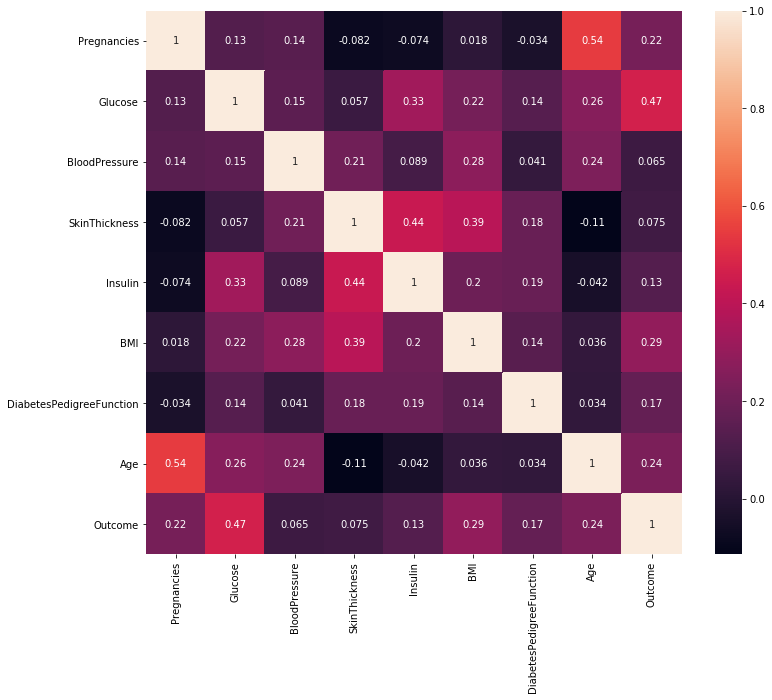

In [8]:
#Correlation
sb.heatmap(df.corr(), annot = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FA35C13108>,
      dtype=object)

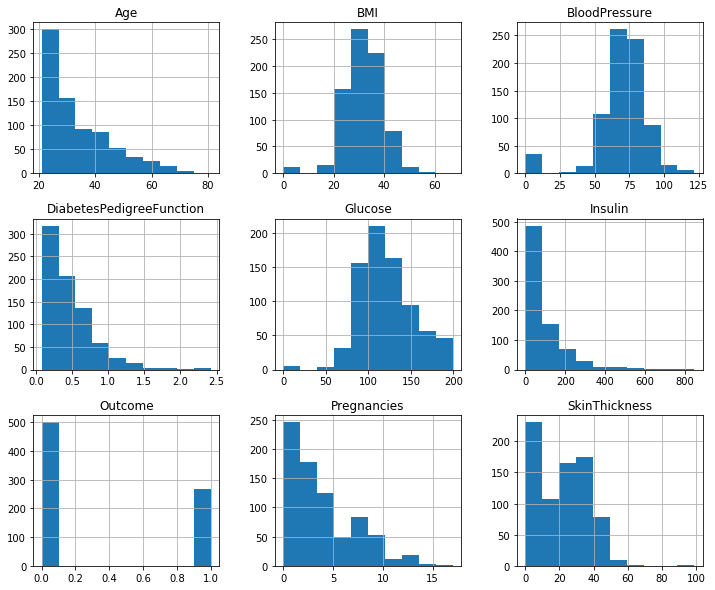

In [9]:
df.hist()

In [10]:
#living person can not have a value 0 for Bloodpressuere, BMI and Glucose
df_mod = df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]
print(df_mod.shape)

(724, 9)


Q.1 Calculate the Number of diabetic patient and non diabetic

In [11]:
df_mod.groupby('Outcome').size()

Outcome
0    475
1    249
dtype: int64

Q.2 Which Age has the highest diabetes patients 

In [12]:
pd.crosstab(df_mod['Age'],df_mod['Outcome'])

Outcome,0,1
Age,,
21,54,5
22,56,11
23,29,6
24,37,7
25,31,13
26,24,7
27,24,7
28,24,9
29,15,12


In [13]:
df_mod.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
# Here Outcome is our dependent variabe
X = df_mod[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].values
Y = df_mod[['Outcome']].values

ML  ALGORITHMS

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
models = []

models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = df_mod.Outcome, random_state=0)

ACCURACY SCORES

In [19]:
names = []
scores = []
for name, model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    scores.append(accuracy_score(Y_test, Y_pred))
    names.append(name)
    tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0   LR  0.762431
1  KNN  0.729282
2   RF  0.767956
